<a href="https://colab.research.google.com/github/Thivadee19/Machine-Learning_Advance-Data-Analytic_Assignment-/blob/main/Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/Salaries.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [80]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [6]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [7]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [8]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [9]:
# Mean of all salaries
df.mean()

Unnamed: 0          199.000000
yrs.since.phd        22.314861
yrs.service          17.614610
salary           113706.458438
dtype: float64

In [10]:
# Median of all salaries
df.median()


Unnamed: 0          199.0
yrs.since.phd        21.0
yrs.service          16.0
salary           107300.0
dtype: float64

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [12]:
df2 = df[['sex','salary']]
df2
## I selected colum Sex and Salary and print df2 to check the colum that I choosed. 

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [17]:
df2.median()

salary    107300.0
dtype: float64

In [60]:
df.groupby(['Gender'])['salary'].median()
## This is showign the median saraly males VS Females 

Gender
Female    103750
Male      108043
Name: salary, dtype: int64

Finding the Median salary for all females

In [55]:
gender_salary = df.groupby(['Gender', 'salary'],as_index=False).salary.median()



In [56]:
print(gender_salary)

     Gender  salary
0    Female   62884
1    Female   63100
2    Female   71065
3    Female   72500
4    Female   73300
..      ...     ...
372    Male  193000
373    Male  194800
374    Male  204000
375    Male  205500
376    Male  231545

[377 rows x 2 columns]


In [59]:
df.groupby(['Gender'])['salary'].median() 
## This is showign the median saraly males VS Females 

Gender
Female    103750
Male      108043
Name: salary, dtype: int64

Comparing the Mean salary of Males and Females

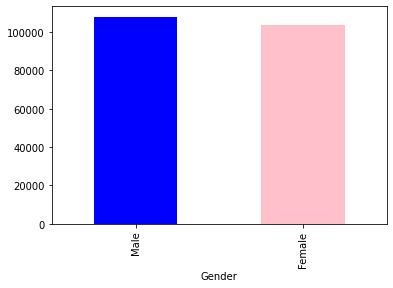

In [90]:
df.groupby(['Gender'])['salary'].median().sort_values(ascending=False).plot(kind='bar', color=['blue', 'pink'])
#Median for male is 108,043 and female is 103,750 which 4,293 different. Bar grahp is always good and easy to check the different when you want to compare some thing. but in this case, it doesn't show the diffrent because the median only 4,293 diffrent.

In [39]:
df.groupby(['Gender'])['salary'].count()

Gender
Female     39
Male      358
Name: salary, dtype: int64

In [40]:
df.groupby(['salary'])['Gender'].count()

salary
57800     1
62884     1
63100     1
63900     1
67559     1
         ..
193000    1
194800    1
204000    1
205500    1
231545    1
Name: Gender, Length: 371, dtype: int64

In [ ]:
# The difference between mean salaries of male and female


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [86]:
df

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [85]:
df.groupby(['yrs.service'])['salary'].median()

yrs.service
0      84000.0
1      74856.0
2      84240.0
3      79125.0
4      92000.0
5      94129.5
6      97000.0
7     107154.0
8      95152.0
9     108100.0
10    104350.0
11    114187.5
12    128148.0
13    170500.0
14    112633.5
15    124714.0
16    135067.5
17    117912.0
18    126300.0
19    145098.0
20    126641.5
21    135110.0
22    109925.0
23    110799.0
24     83232.0
25    130840.5
26    121200.0
27    139219.0
28    122500.0
29    148500.0
30    122875.0
31    125598.0
32    124309.0
33    145225.0
34     97920.5
35    100351.0
36    107332.5
37    127964.5
38    143590.0
39    110175.0
40    101036.0
41    141500.0
43    149902.5
44    105000.0
45    127203.0
46    100600.0
48    107200.0
49     81800.0
51     57800.0
53     90000.0
57     76840.0
60    192253.0
Name: salary, dtype: float64

In [89]:
df.groupby(['Gender'])['salary'].median()

Gender
Female    103750
Male      108043
Name: salary, dtype: int64

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

People who have salary of greater than or equal to 200,000

Your Findings here...


# Rename values, subset columns, etc

In [87]:
df = df.rename(columns={'sex':'Gender', 'rank':'position'})

In [88]:
display(df)

,Unnamed: 0,position,discipline,yrs.since.phd,yrs.service,Gender,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

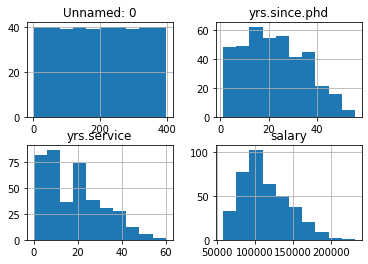

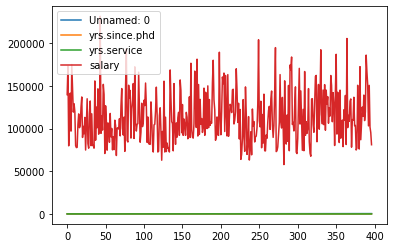

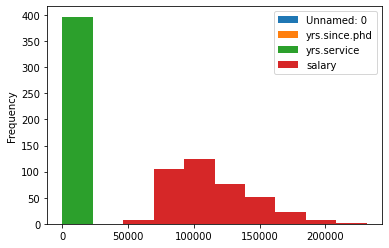

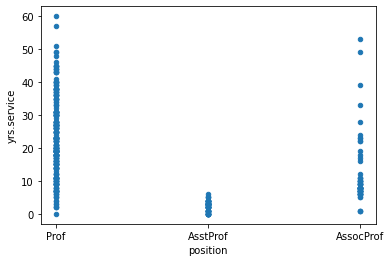

In [111]:
df.hist()
df.plot()
df.plot(kind="hist")
df.plot(kind="scatter", x='position', y='yrs.service')
##Check overal data

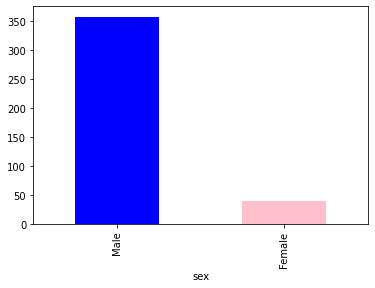

In [23]:
df3 = df.groupby(['sex'])['salary'].count().sort_values(ascending=False).plot(kind='bar', color=['blue', 'pink'])
#


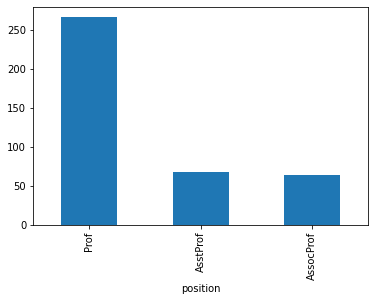

In [103]:
df3 = df.groupby(['position'])['salary'].count().sort_values(ascending=False).plot(kind='bar')

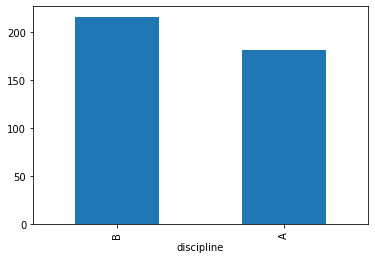

In [109]:
df3 = df.groupby(['discipline'])['Gender'].count().sort_values(ascending=False).plot(kind='bar')

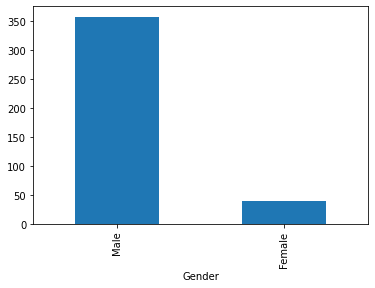

In [110]:
df3 = df.groupby(['Gender'])['discipline'].count().sort_values(ascending=False).plot(kind='bar')

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Your Findings here...



I also discovered that the -

 Your Findings here...



